# Study Case Support Vector Machine


## Import Packages and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.svm import SVC, SVR
# SVC = Support Vector Classifier (SVM untuk klasifikasi)
# SVM = Support Vector Regressor (SVM untuk regresi)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions # untuk membuat plot SVM

import warnings
warnings.filterwarnings('ignore')

Dalam study case ini kita akan gunakan data diabetes.csv

In [2]:
data_diabetes = pd.read_csv('diabetes.csv')
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## SVM dengan dua fitur

#### EDA

In [3]:
pd.isnull(data_diabetes).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
data_diabetes.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

berdasarkan korelasi, maka kita akan gunakan **Glucose** dan **BMI**

#### Create Model

In [14]:
X = data_diabetes[['Glucose','BMI']]
y = data_diabetes['Outcome']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [28]:
model = SVC()
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Fit and Predict

In [29]:
y_test.value_counts()

0    154
1     77
Name: Outcome, dtype: int64

In [30]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [32]:
pd.DataFrame({'class actual' : y_test, 'class predict' : pred})

,class actual,class predict
195,1,0
51,0,0
66,1,0
437,0,1
665,0,0
382,0,0
99,1,0
656,0,0
394,1,1
353,0,0


Akurasi untuk test

In [33]:
model.score(X_test,y_test)

0.6623376623376623

Akurasi untuk train

In [34]:
model.score(X_train,y_train)

0.9422718808193669

#### Visualize Model

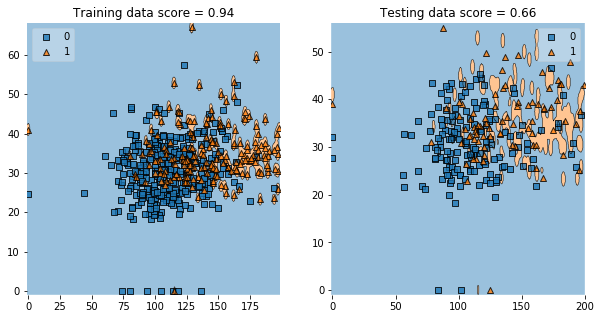

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(121)
plt.title('Training data score = %1.2f'%model.score(X_train, y_train))
plot_decision_regions(X= X_train.values, y= y_train.values, clf = model, legend = 2)

plt.subplot(122)
plt.title('Testing data score = %1.2f'%model.score(X_test, y_test))
plot_decision_regions(X= X_test.values, y= y_test.values, clf = model, legend = 1)

plt.show()

#### Use Different C Values

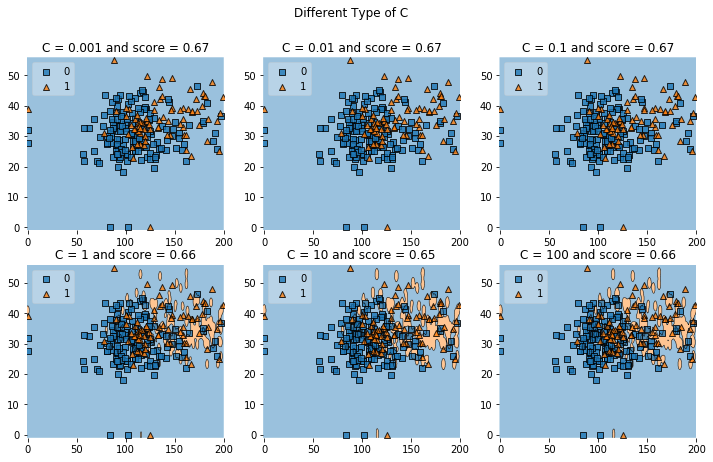

In [36]:
param_c = [0.001, 0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(12,7))
plt.suptitle('Different Type of C')
for i in range (6):
    plt.subplot(2,3,i+1)
    model = SVC(C = param_c[i])
    model.fit(X_train, y_train)
    plot_decision_regions(X = X_test.values, y = y_test.values, clf = model, legend = 2)
    title = "C = " + str(param_c[i]) + " " + "and score = " + str(round(model.score(X_test,y_test),2))
    plt.title(title)


#### Different Type of Gamma

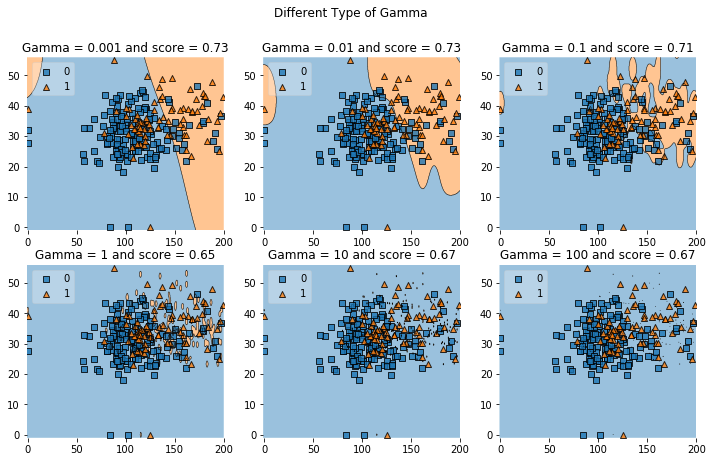

In [37]:
param_gamma = [0.001, 0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(12,7))
plt.suptitle('Different Type of Gamma')
for i in range (6):
    plt.subplot(2,3,i+1)
    model = SVC(gamma= param_gamma[i])
    model.fit(X_train, y_train)
    plot_decision_regions(X = X_test.values, y = y_test.values, clf = model, legend = 2)
    title = "Gamma = " + str(param_gamma[i]) + " " + "and score = " + str(round(model.score(X_test,y_test),2))
    plt.title(title)

#### Different Type of Kernel

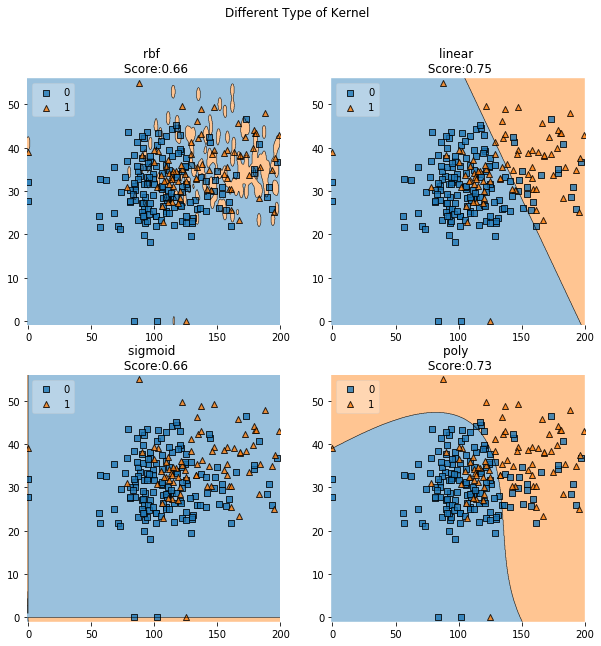

In [38]:
param_kernel = ['rbf','linear','sigmoid','poly']
plt.figure(figsize = (10,10))
plt.suptitle('Different Type of Kernel')
for i in range (4):
    plt.subplot(2,2,i+1)
    model = SVC(kernel = param_kernel[i])
    model.fit(X_train, y_train)
    plot_decision_regions(X = X_test.values, y = y_test.values, clf = model, legend = 2)
    plt.title('%s \n Score:%1.2f' %(param_kernel[i], model.score(X_test, y_test)))

## SVM Dengan Banyak Fitur

#### Create Model

In [39]:
X = data_diabetes.drop(['Outcome'], axis = 1)
y = data_diabetes['Outcome']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [41]:
model2 = SVC()
model2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Fit and Predict

In [42]:
y_test.value_counts()

0    154
1     77
Name: Outcome, dtype: int64

In [ ]:
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)
pred